In [17]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from path import Path

In [18]:
# Loading data
file_path = Path("WW_clean_data_labelEncoded_Winner.csv")
ww_df = pd.read_csv(file_path)
ww_df=ww_df.drop(['Unnamed: 0', 'date'], axis=1)
ww_df.head()

,R_fighter,B_fighter,Winner,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,...,B_age,R_age,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,R_Stance_nan,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,B_Stance_nan
0,Song Kenan,Max Griffin,0,809.531250,28,0,0,1,1,4,...,35.0,31.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Leon Edwards,Belal Muhammad,1,876.053223,34,0,0,1,4,9,...,32.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Matthew Semelsberger,Jason Witt,2,238.500000,3,0,0,1,1,1,...,34.0,28.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Sean Brady,Jake Matthews,2,861.528564,34,0,2,0,3,10,...,26.0,28.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Belal Muhammad,Dhiego Lima,2,760.285156,18,2,0,1,3,4,...,32.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
X=ww_df.drop(['Winner', 'R_fighter', 'B_fighter'], axis=1)
y=ww_df.Winner

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Define the basic neural network model
number_input_features = len(X_train_scaled[0])

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=30, activation="tanh", input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=20, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=10, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=5, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=300, shuffle=True)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/300
3/3 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.2381
Epoch 2/300
3/3 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.2024
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.2024
Epoch 4/300
3/3 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.2024
Epoch 5/300
3/3 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.1905
Epoch 6/300
3/3 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.1786
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.1548
Epoch 8/300
3/3 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 0.1310
Epoch 9/300
3/3 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.1310
Epoch 10/300
3/3 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.1429
Epoch 11/300
3/3 [===========

Epoch 84/300
3/3 [==============================] - 0s 3ms/step - loss: -2.1571 - accuracy: 0.3333
Epoch 85/300
3/3 [==============================] - 0s 2ms/step - loss: -2.1748 - accuracy: 0.3333
Epoch 86/300
3/3 [==============================] - 0s 3ms/step - loss: -2.1920 - accuracy: 0.3333
Epoch 87/300
3/3 [==============================] - 0s 1ms/step - loss: -2.2100 - accuracy: 0.3333
Epoch 88/300
3/3 [==============================] - 0s 3ms/step - loss: -2.2292 - accuracy: 0.3452
Epoch 89/300
3/3 [==============================] - 0s 1ms/step - loss: -2.2447 - accuracy: 0.3452
Epoch 90/300
3/3 [==============================] - 0s 2ms/step - loss: -2.2597 - accuracy: 0.3452
Epoch 91/300
3/3 [==============================] - 0s 1ms/step - loss: -2.2756 - accuracy: 0.3452
Epoch 92/300
3/3 [==============================] - 0s 1ms/step - loss: -2.2891 - accuracy: 0.3452
Epoch 93/300
3/3 [==============================] - 0s 1ms/step - loss: -2.3028 - accuracy: 0.3452
Epoch 94/3

3/3 [==============================] - 0s 1ms/step - loss: -3.1373 - accuracy: 0.3452
Epoch 167/300
3/3 [==============================] - 0s 2ms/step - loss: -3.1485 - accuracy: 0.3452
Epoch 168/300
3/3 [==============================] - 0s 2ms/step - loss: -3.1590 - accuracy: 0.3452
Epoch 169/300
3/3 [==============================] - 0s 2ms/step - loss: -3.1700 - accuracy: 0.3452
Epoch 170/300
3/3 [==============================] - 0s 2ms/step - loss: -3.1802 - accuracy: 0.3452
Epoch 171/300
3/3 [==============================] - 0s 3ms/step - loss: -3.1914 - accuracy: 0.3452
Epoch 172/300
3/3 [==============================] - 0s 2ms/step - loss: -3.2022 - accuracy: 0.3452
Epoch 173/300
3/3 [==============================] - 0s 3ms/step - loss: -3.2134 - accuracy: 0.3452
Epoch 174/300
3/3 [==============================] - 0s 1ms/step - loss: -3.2238 - accuracy: 0.3452
Epoch 175/300
3/3 [==============================] - 0s 2ms/step - loss: -3.2343 - accuracy: 0.3452
Epoch 176/300


3/3 [==============================] - 0s 2ms/step - loss: -3.9985 - accuracy: 0.3452
Epoch 249/300
3/3 [==============================] - 0s 1ms/step - loss: -4.0086 - accuracy: 0.3452
Epoch 250/300
3/3 [==============================] - 0s 2ms/step - loss: -4.0192 - accuracy: 0.3452
Epoch 251/300
3/3 [==============================] - 0s 2ms/step - loss: -4.0301 - accuracy: 0.3452
Epoch 252/300
3/3 [==============================] - 0s 2ms/step - loss: -4.0398 - accuracy: 0.3452
Epoch 253/300
3/3 [==============================] - 0s 1ms/step - loss: -4.0500 - accuracy: 0.3452
Epoch 254/300
3/3 [==============================] - 0s 1ms/step - loss: -4.0600 - accuracy: 0.3452
Epoch 255/300
3/3 [==============================] - 0s 2ms/step - loss: -4.0704 - accuracy: 0.3452
Epoch 256/300
3/3 [==============================] - 0s 1ms/step - loss: -4.0814 - accuracy: 0.3452
Epoch 257/300
3/3 [==============================] - 0s 2ms/step - loss: -4.0910 - accuracy: 0.3452
Epoch 258/300


<AxesSubplot:>

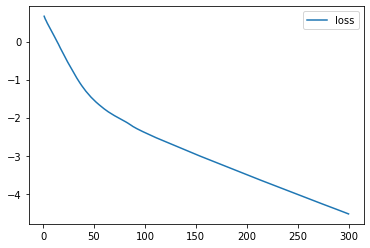

In [50]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

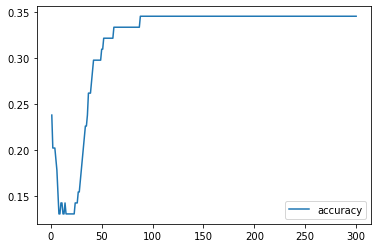

In [51]:
# Plot the accuracy
history_df.plot(y="accuracy")